Importando o arquivo CSV e realizando o processo de EDA nos dados

In [21]:
import pandas as pd
import numpy as np

#acessando arquivo csv
insurance_data = pd.read_csv('Insurance_Data_.csv')
insurance_data = pd.read_csv('Insurance_Data_.csv', delimiter=';')
insurance_data.info()
insurance_data.describe()
insurance_data.shape
insurance_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Policy Number      10004 non-null  object 
 1   CustomerID         10004 non-null  object 
 2   Gender             10004 non-null  object 
 3   Age                10004 non-null  int64  
 4   Policy Type        10004 non-null  object 
 5   Policy Start Date  10004 non-null  object 
 6   Policy End Date    10004 non-null  object 
 7   Premium Amount     10004 non-null  float64
 8   Coverage Amount    10004 non-null  float64
 9   Claim Number       10004 non-null  object 
 10  Claim Date         5649 non-null   object 
 11  Claim Amount       5649 non-null   float64
 12  Claim Status       10004 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1016.2+ KB


/usr/local/lib/python3.12/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Policy Number,CustomerID,Gender,Age,Policy Type,Policy Start Date,Policy End Date,Premium Amount,Coverage Amount,Claim Number,Claim Date,Claim Amount,Claim Status
0,P1,C1,Female,73,Auto,13/02/2024,13/02/2025,240.64,33175.10,C1,NaN,NaN,Rejected
1,P2,C2,Male,44,Travel,03/03/2024,03/03/2025,1059.73,85046.42,C2,22/06/2024,1493.06,Pending
2,P3,C3,Female,28,Travel,15/06/2024,15/06/2025,1019.59,68525.53,C3,NaN,NaN,Rejected
3,P4,C4,Male,85,Travel,03/06/2024,03/06/2025,549.70,17053.27,C4,25/02/2025,5021.34,Pending
4,P5,C5,Female,57,Travel,13/06/2024,13/06/2025,841.15,55007.27,C5,30/11/2024,1347.46,Pending


Limpeza de Dados

In [22]:
#Limpeza de Dados
#Substituir valores vazios em sinistros rejeitados ---
# Documentação: Estamos usando o .loc para fazer uma atribuição condicional.
# A condição insurance_data.loc[insurance_data['Claim Status'] == 'Rejected seleciona as linhas.
# As colunas ['Claim Date', 'Claim Amount'] as que queremos alterar.
# O valor 'Not Applicable' será atribuído a essas células específicas.

insurance_data.loc[insurance_data['Claim Status'] == 'Rejected', ['Claim Date', 'Claim Amount']] = 'Not Applicable'

# -- Exibir o Resultado da Substituição ---
print("--- Amostra dos Dados Após Substituição ---")
# Usamos .tail() para ver algumas das últimas linhas e confirmar a mudança
print(insurance_data.tail(10))
print("\n" + "="*50 + "\n")
print("--- Informações Técnicas Após Substituição ---")
insurance_data.info()


# Transformação de Flo

--- Amostra dos Dados Após Substituição ---
      Policy Number CustomerID  Gender  Age Policy Type Policy Start Date  \
9994          P9995      C9995  Female   22        Auto        20/02/2024   
9995          P9996      C9996    Male   79      Travel        03/01/2024   
9996          P9997      C9997  Female   43      Travel        11/02/2024   
9997          P9998      C9998    Male   67      Health        04/05/2024   
9998          P9999      C9999  Female   71      Travel        21/09/2023   
9999         P10000     C10000    Male   44        Life        31/07/2023   
10000            P1         C1  Female   73        Auto        13/02/2024   
10001            P2         C2    Male   44      Travel        03/03/2024   
10002            P2         C2    Male   44      Travel        03/03/2024   
10003            P4         C4    Male   85      Travel        03/06/2024   

      Policy End Date  Premium Amount  Coverage Amount Claim Number  \
9994       20/02/2025         1019.99

/tmp/ipython-input-2802725283.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Not Applicable' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  insurance_data.loc[insurance_data['Claim Status'] == 'Rejected', ['Claim Date', 'Claim Amount']] = 'Not Applicable'


Formatação de Colunas

In [23]:
# Formatar colunas monetárias como Dólar (USD)

# Documentação: As colunas que queremos formatar.
money_columns = ['Premium Amount', 'Coverage Amount', 'Claim Amount']

# Documentação: Usamos um laço para aplicar a formatação a cada coluna.
# A função .apply() com uma lambda é usada para processar cada valor.
# A lógica é:
# 1. Tente converter o valor para um número (float).
# 2. Se conseguir, formate-o como f'${valor:,.2f}', que adiciona o '$',
#    separador de milhar (,) e fixa em duas casas decimais.
# 3. Se não conseguir (porque o valor já é um texto como "not applicable"),
#    apenas retorne o valor original.

for col in money_columns:
    insurance_data[col] = insurance_data[col].apply(lambda x: f'${float(x):,.2f}' if str(x).replace('.', '', 1).isdigit() else x)


# --- 7. Exibir o Resultado da Formatação ---
print("--- Amostra dos Dados com Valores Formatados em USD ---")
print(insurance_data[['Premium Amount', 'Coverage Amount', 'Claim Amount']].head())
print("\n" + "="*50 + "\n")
print("--- Informações Técnicas Após a Formatação ---")
insurance_data.info()
insurance_data.head()

--- Amostra dos Dados com Valores Formatados em USD ---
  Premium Amount Coverage Amount    Claim Amount
0        $240.64      $33,175.10  Not Applicable
1      $1,059.73      $85,046.42       $1,493.06
2      $1,019.59      $68,525.53  Not Applicable
3        $549.70      $17,053.27       $5,021.34
4        $841.15      $55,007.27       $1,347.46


--- Informações Técnicas Após a Formatação ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Policy Number      10004 non-null  object
 1   CustomerID         10004 non-null  object
 2   Gender             10004 non-null  object
 3   Age                10004 non-null  int64 
 4   Policy Type        10004 non-null  object
 5   Policy Start Date  10004 non-null  object
 6   Policy End Date    10004 non-null  object
 7   Premium Amount     10004 non-null  object
 8   Coverage Amount  

,Policy Number,CustomerID,Gender,Age,Policy Type,Policy Start Date,Policy End Date,Premium Amount,Coverage Amount,Claim Number,Claim Date,Claim Amount,Claim Status
0,P1,C1,Female,73,Auto,13/02/2024,13/02/2025,$240.64,"$33,175.10",C1,Not Applicable,Not Applicable,Rejected
1,P2,C2,Male,44,Travel,03/03/2024,03/03/2025,"$1,059.73","$85,046.42",C2,22/06/2024,"$1,493.06",Pending
2,P3,C3,Female,28,Travel,15/06/2024,15/06/2025,"$1,019.59","$68,525.53",C3,Not Applicable,Not Applicable,Rejected
3,P4,C4,Male,85,Travel,03/06/2024,03/06/2025,$549.70,"$17,053.27",C4,25/02/2025,"$5,021.34",Pending
4,P5,C5,Female,57,Travel,13/06/2024,13/06/2025,$841.15,"$55,007.27",C5,30/11/2024,"$1,347.46",Pending


Análise de Idade e Gênero

--- Estatísticas Descritivas da Idade ---
count    10004.000000
mean        52.342363
std         20.303034
min         18.000000
25%         35.000000
50%         52.000000
75%         70.000000
max         87.000000
Name: Age, dtype: float64




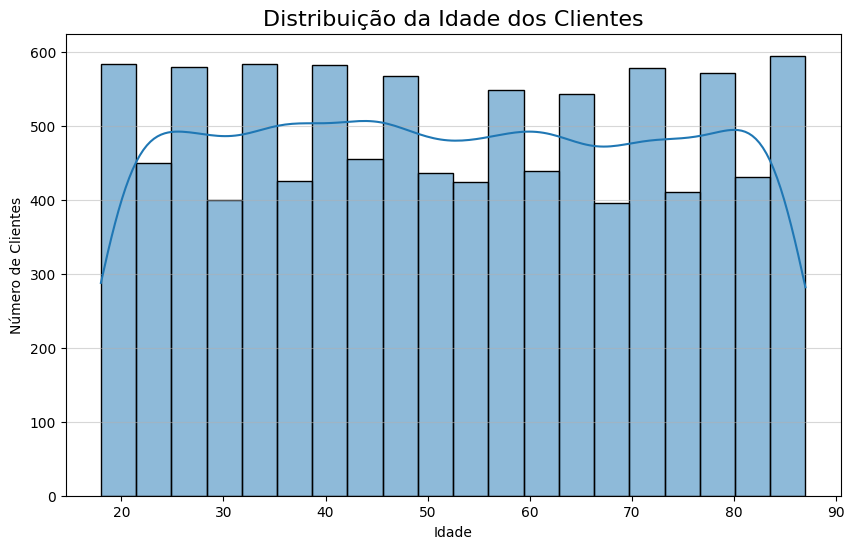

--- Proporção de Clientes por Gênero ---
Gender
Male      50.009996
Female    49.990004
Name: proportion, dtype: float64




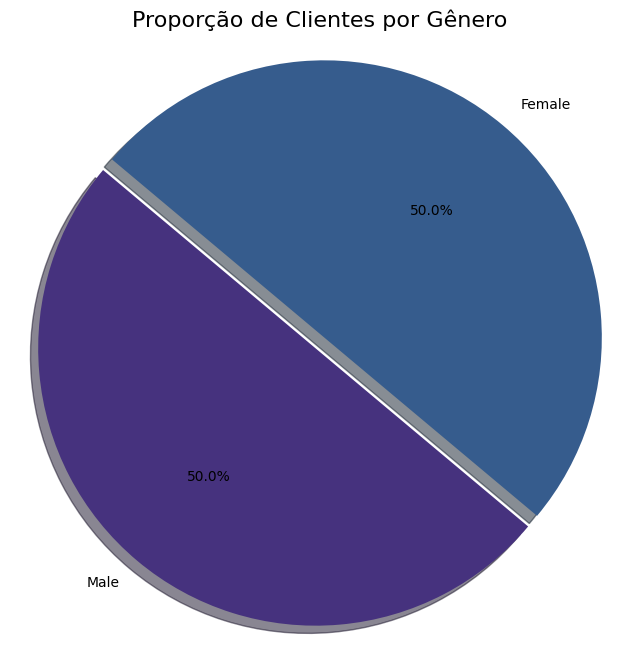

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Análise da Idade ---

# Documentação: A função .describe() é uma forma rápida e poderosa de obter as
# principais estatísticas de uma coluna numérica. Ela nos dá a contagem, média,
# desvio padrão, valor mínimo, máximo e os quartis.
print("--- Estatísticas Descritivas da Idade ---")
print(insurance_data['Age'].describe())
print("\n" + "="*50 + "\n")

# Documentação para o Gráfico de Idade:
# Um histograma é a melhor forma de visualizar a distribuição de uma variável numérica.
# Ele nos mostra em quais faixas de idade a maioria dos clientes se concentra.
plt.figure(figsize=(10, 6)) # Define o tamanho do gráfico
sns.histplot(insurance_data['Age'], bins=20, kde=True) # Cria o histograma com 20 "barras" e uma linha de densidade
plt.title('Distribuição da Idade dos Clientes', fontsize=16)
plt.xlabel('Idade')
plt.ylabel('Número de Clientes')
plt.grid(axis='y', alpha=0.5)
plt.show()


# --- Análise do Gênero ---

# Documentação: A função .value_counts() conta a ocorrência de cada valor único
# em uma coluna. Usamos normalize=True para obter a porcentagem em vez da contagem bruta.
print("--- Proporção de Clientes por Gênero ---")
gender_distribution = insurance_data['Gender'].value_counts(normalize=True) * 100
print(gender_distribution)
print("\n" + "="*50 + "\n")


# --- Análise do Gênero (Alternativa com Gráfico de Pizza) ---

# Documentação: Primeiro, contamos as ocorrências de cada gênero, como antes.
gender_counts = insurance_data['Gender'].value_counts()

# Documentação: Em seguida, preparamos os dados para o gráfico.
# labels serão 'Female', 'Male'.
# sizes serão as contagens correspondentes.
labels = gender_counts.index
sizes = gender_counts.values

# Documentação: Podemos definir algumas configurações estéticas.
# 'explode' serve para "afastar" uma fatia do centro.
# 'colors' permite-nos escolher uma paleta de cores.
explode = (0.05, 0)  # "explode" a primeira fatia (ex: Female) em 5%
colors = sns.color_palette('viridis') # Usa a mesma paleta de cores do gráfico anterior

# Documentação: Agora, criamos o gráfico de pizza com plt.pie().
# autopct='%1.1f%%' é o comando mágico para mostrar as percentagens com uma casa decimal.
# shadow=True e startangle=140 são apenas para melhorar a aparência.
plt.figure(figsize=(8, 8)) # Define um tamanho de figura quadrado, ideal para pizza
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)

# Documentação: Adicionamos um título e garantimos que o gráfico seja um círculo perfeito.
plt.title('Proporção de Clientes por Gênero', fontsize=16)
plt.axis('equal')  # Garante que o gráfico de pizza seja desenhado como um círculo.

plt.show()

Tipo de Apólice Mais Popular e Preferência de Apólice P/ Gênero

--- Contagem de Clientes por Tipo de Apólice ---
Policy Type
Travel    4148
Health    2000
Auto      1595
Life      1248
Home      1013
Name: count, dtype: int64




/tmp/ipython-input-59930513.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Policy Type', data=df, order=policy_counts.index, palette='viridis')


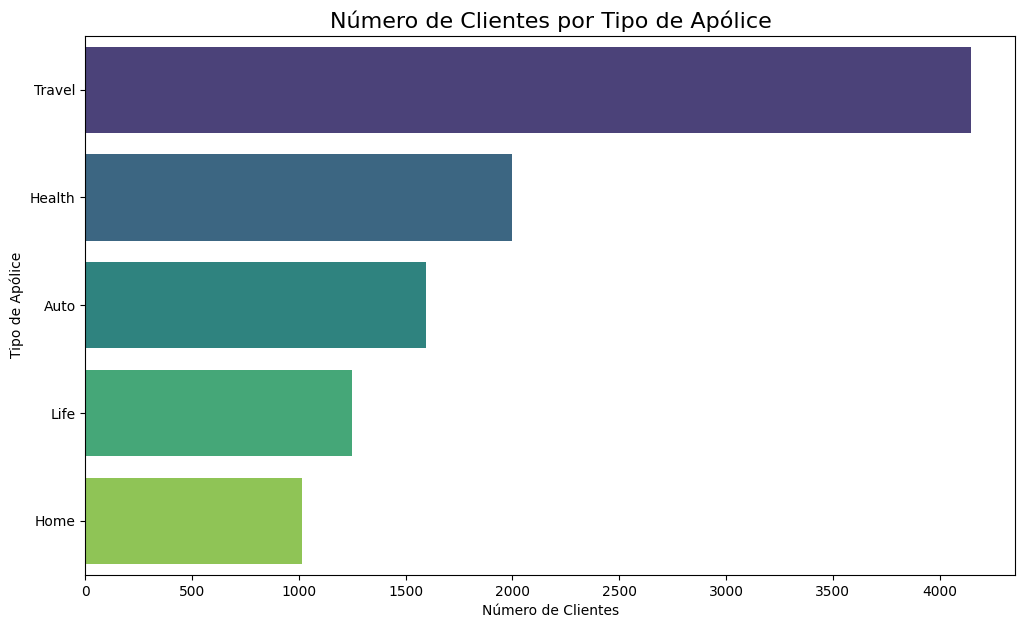

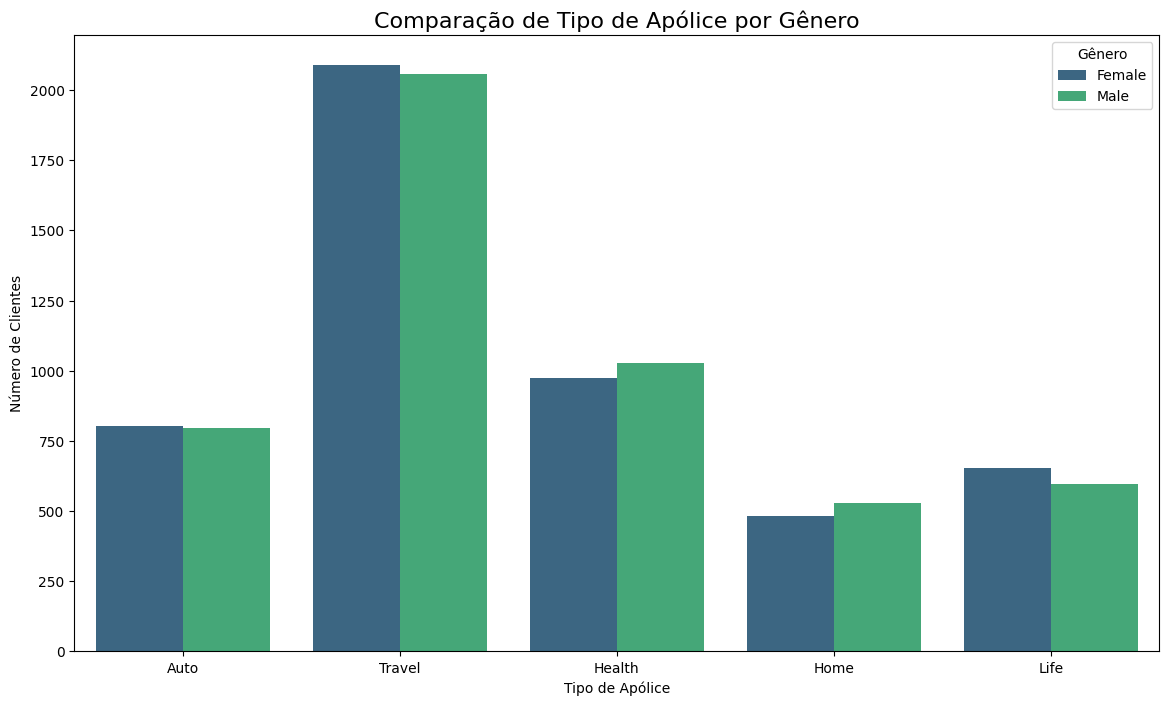

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Parte 1: Tipo de Apólice Mais Popular ---

# Documentação: Usamos .value_counts() para contar a frequência de cada tipo de apólice.
print("--- Contagem de Clientes por Tipo de Apólice ---")
policy_counts = insurance_data['Policy Type'].value_counts()
print(policy_counts)
print("\n" + "="*50 + "\n")

# Documentação para o Gráfico de Popularidade:
# Um gráfico de barras é a melhor forma de comparar a contagem entre diferentes categorias.
# Vamos criar um gráfico de barras horizontal, que facilita a leitura dos nomes de cada apólice.
# O parâmetro 'order=policy_counts.index' garante que as barras fiquem ordenadas da maior para a menor.
plt.figure(figsize=(12, 7))
sns.countplot(y='Policy Type', data=df, order=policy_counts.index, palette='viridis')
plt.title('Número de Clientes por Tipo de Apólice', fontsize=16)
plt.xlabel('Número de Clientes')
plt.ylabel('Tipo de Apólice')
plt.show()


# --- Parte 2: Preferência de Apólice por Gênero ---

# Documentação para o Gráfico Agrupado:
# Para comparar as preferências entre gêneros, um gráfico de barras agrupado é ideal.
# O parâmetro 'hue="gender"' no Seaborn faz exatamente isso: ele cria barras lado a lado
# para 'Male' e 'Female' para cada tipo de apólice no eixo x.
plt.figure(figsize=(14, 8))
sns.countplot(x='Policy Type', hue='Gender', data=insurance_data, palette='viridis')
plt.title('Comparação de Tipo de Apólice por Gênero', fontsize=16)
plt.xlabel('Tipo de Apólice')
plt.ylabel('Número de Clientes')
plt.legend(title='Gênero') # Adiciona uma legenda para explicar as cores
plt.show()

Análise Financeira

--- Receita Total (Prêmio) por Tipo de Apólice ---
Policy Type
Travel    2478329.99
Health    1199727.04
Auto       959863.74
Life       734816.05
Home       604233.06
Name: premium_numeric, dtype: float64




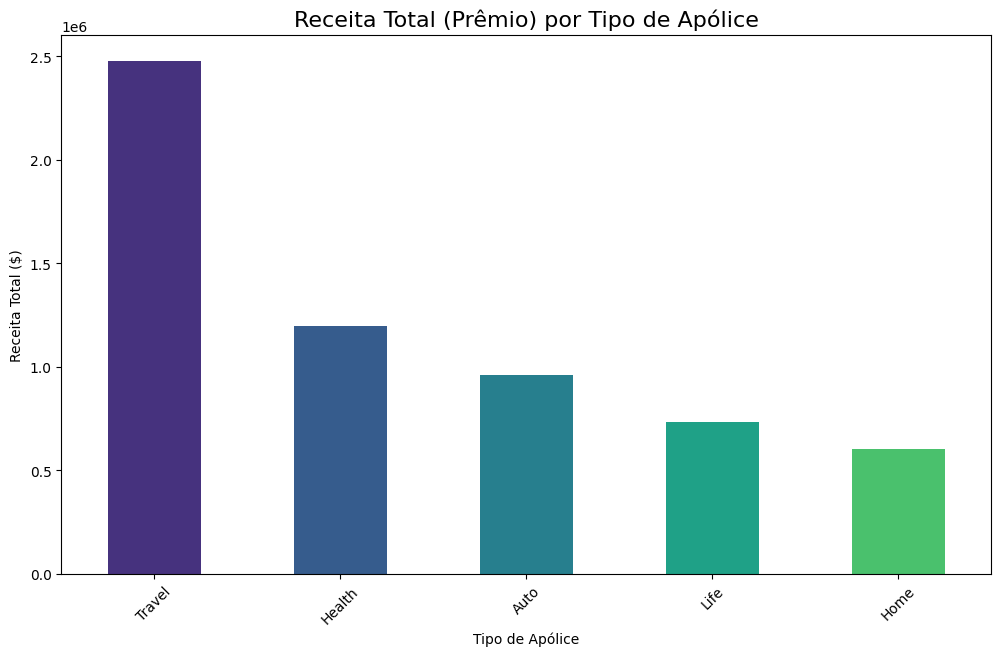

--- Custo Total (Sinistros) por Tipo de Apólice ---
Policy Type
Travel    7096869.34
Health    3432319.02
Auto      2724347.12
Life      2063004.60
Home      1595762.65
Name: claim_numeric, dtype: float64




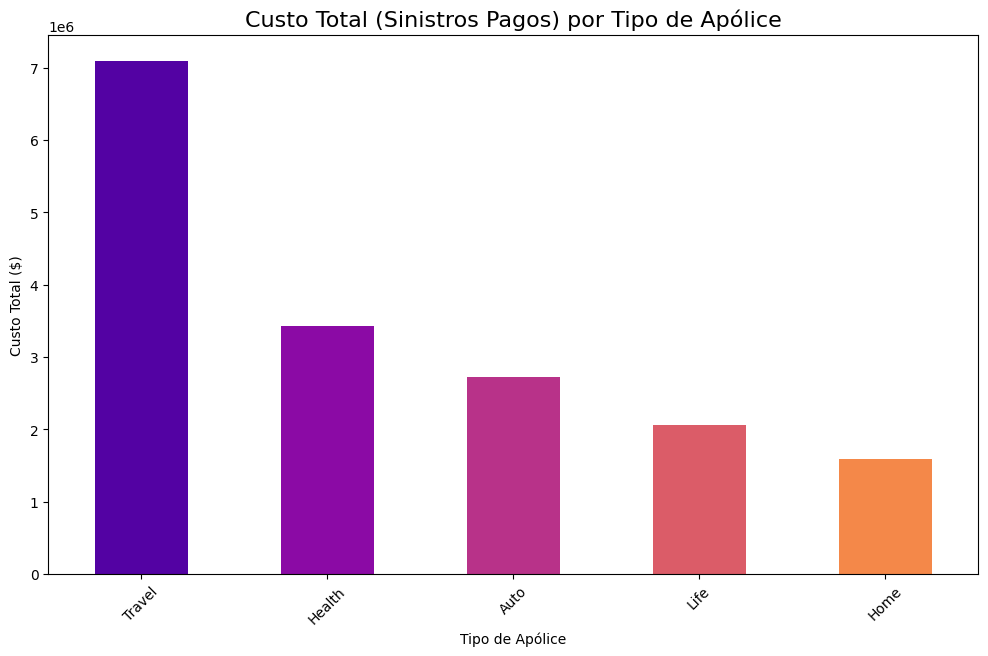

--- Lucratividade por Tipo de Apólice ---
                receita       custo       lucro
Policy Type                                    
Home          604233.06  1595762.65  -991529.59
Life          734816.05  2063004.60 -1328188.55
Auto          959863.74  2724347.12 -1764483.38
Health       1199727.04  3432319.02 -2232591.98
Travel       2478329.99  7096869.34 -4618539.35




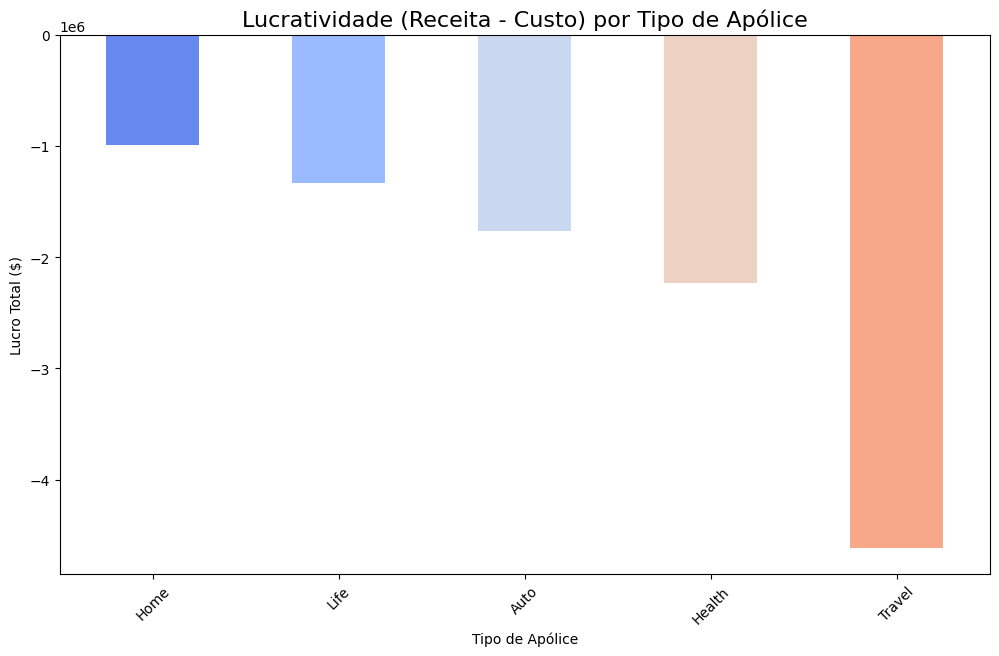

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Parte 1: Preparar Dados para Análise ---

# Documentação: Como as colunas de valor foram formatadas como texto (ex: '$1,234.56'),
# precisamos revertê-las para o formato numérico para podermos fazer cálculos.
# Vamos criar novas colunas numéricas para não alterar as colunas formatadas.

# O método .str.replace('[$,]', '', regex=True) usa uma expressão regular para
# remover tanto o '$' quanto a ','. O pd.to_numeric converte o texto limpo para número.
# errors='coerce' garante que textos como 'not applicable' se tornem nulos (NaN).

insurance_data['premium_numeric'] = pd.to_numeric(insurance_data['Premium Amount'].str.replace('[$,]', '', regex=True), errors='coerce')
insurance_data['claim_numeric'] = pd.to_numeric(insurance_data['Claim Amount'].str.replace('[$,]', '', regex=True), errors='coerce')


# --- Parte 2: Análise de Receita (Premium) por Apólice ---

# Documentação: Agrupamos os dados por 'policy_type' e somamos os valores dos prêmios
# na nossa nova coluna numérica. .sort_values() ordena o resultado.
revenue_by_policy = insurance_data.groupby('Policy Type')['premium_numeric'].sum().sort_values(ascending=False)

print("--- Receita Total (Prêmio) por Tipo de Apólice ---")
print(revenue_by_policy)
print("\n" + "="*50 + "\n")

# Visualização da Receita
plt.figure(figsize=(12, 7))
revenue_by_policy.plot(kind='bar', color=sns.color_palette('viridis'))
plt.title('Receita Total (Prêmio) por Tipo de Apólice', fontsize=16)
plt.xlabel('Tipo de Apólice')
plt.ylabel('Receita Total ($)')
plt.xticks(rotation=45) # Gira os rótulos do eixo X para melhor leitura
plt.show()


# --- Parte 3: Análise de Custo (Claims) por Apólice ---

# Documentação: Fazemos o mesmo para os custos, somando os valores de sinistros.
cost_by_policy = insurance_data.groupby('Policy Type')['claim_numeric'].sum().sort_values(ascending=False)

print("--- Custo Total (Sinistros) por Tipo de Apólice ---")
print(cost_by_policy)
print("\n" + "="*50 + "\n")

# Visualização do Custo
plt.figure(figsize=(12, 7))
cost_by_policy.plot(kind='bar', color=sns.color_palette('plasma'))
plt.title('Custo Total (Sinistros Pagos) por Tipo de Apólice', fontsize=16)
plt.xlabel('Tipo de Apólice')
plt.ylabel('Custo Total ($)')
plt.xticks(rotation=45)
plt.show()


# --- Parte 4: Análise de Lucratividade (Receita vs. Custo) ---

# Documentação: Para um insight mais profundo, calculamos o lucro.
# Criamos um novo DataFrame com a receita e o custo e subtraímos um do outro.
profitability_df = pd.DataFrame({
    'receita': revenue_by_policy,
    'custo': cost_by_policy
})
profitability_df['lucro'] = profitability_df['receita'] - profitability_df['custo']
profitability_df = profitability_df.sort_values('lucro', ascending=False)

print("--- Lucratividade por Tipo de Apólice ---")
print(profitability_df)
print("\n" + "="*50 + "\n")

# Visualização da Lucratividade
plt.figure(figsize=(12, 7))
profitability_df['lucro'].plot(kind='bar', color=sns.color_palette('coolwarm'))
plt.title('Lucratividade (Receita - Custo) por Tipo de Apólice', fontsize=16)
plt.xlabel('Tipo de Apólice')
plt.ylabel('Lucro Total ($)')
plt.xticks(rotation=45)
plt.show()

Análise de Status de Sinistro

--- Contagem de Sinistros por Status ---
Claim Status
Rejected    4355
Settled     3386
Pending     2263
Name: count, dtype: int64




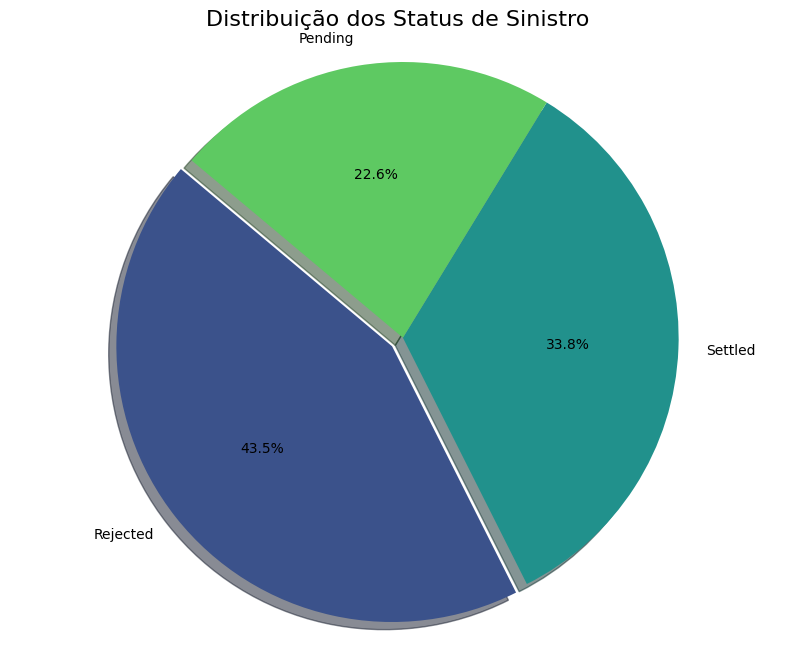

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Parte 1: Análise da Distribuição Geral ---

# Documentação: Usamos .value_counts() para contar a frequência de cada status.
print("--- Contagem de Sinistros por Status ---")
status_counts = insurance_data['Claim Status'].value_counts()
print(status_counts)
print("\n" + "="*50 + "\n")

# Documentação para o Gráfico de Pizza:
# Um gráfico de pizza é ideal para mostrar a proporção de cada status em relação ao total.
# Vamos usar a mesma abordagem que usamos para o gráfico de gênero.
labels = status_counts.index
sizes = status_counts.values
colors = sns.color_palette('viridis', len(labels))
explode = (0.05, 0, 0) # Destaca a primeira fatia (a maior)

plt.figure(figsize=(10, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Distribuição dos Status de Sinistro', fontsize=16)
plt.axis('equal')
plt.show()

Análise de Risco: Taxa de Rejeição por Tipo de Apólice

--- Percentagem de Status de Sinistro por Tipo de Apólice ---
Claim Status    Pending   Rejected    Settled
Policy Type                                  
Auto          22.382445  42.257053  35.360502
Health        22.900000  43.350000  33.750000
Home          20.927937  46.199408  32.872655
Life          23.717949  45.352564  30.929487
Travel        22.661524  42.912247  34.426230




<Figure size 1400x800 with 0 Axes>

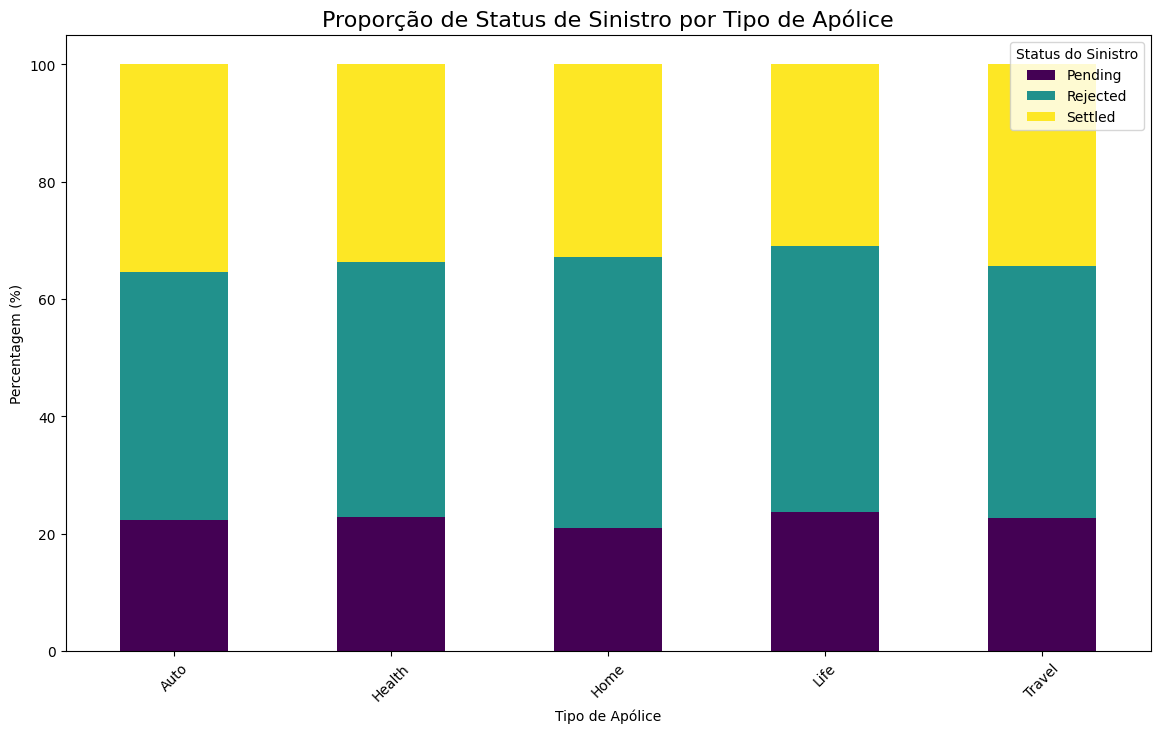

In [36]:
# --- Parte 2: Análise da Taxa de Rejeição por Apólice ---

# Documentação: Usamos .groupby() para agrupar por tipo de apólice e depois
# contamos os status de sinistro dentro de cada grupo.
# O resultado é uma tabela que mostra a contagem de 'Settled', 'Pending' e 'Rejected'
# para cada tipo de apólice.
status_by_policy = insurance_data.groupby('Policy Type')['Claim Status'].value_counts(normalize=True).unstack()

# Multiplicamos por 100 para visualizar como percentagem
status_by_policy_pct = status_by_policy * 100

print("--- Percentagem de Status de Sinistro por Tipo de Apólice ---")
print(status_by_policy_pct)
print("\n" + "="*50 + "\n")


# Documentação para o Gráfico de Barras Empilhadas:
# Um gráfico de barras empilhadas é perfeito para comparar a proporção percentual
# entre diferentes categorias. Cada barra representará 100% de um tipo de apólice,
# e as cores mostrarão a fatia de cada status.
plt.figure(figsize=(14, 8))
status_by_policy_pct.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 8))
plt.title('Proporção de Status de Sinistro por Tipo de Apólice', fontsize=16)
plt.xlabel('Tipo de Apólice')
plt.ylabel('Percentagem (%)')
plt.xticks(rotation=45)
plt.legend(title='Status do Sinistro')
plt.show()